In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
"""Intializes 297 points around 0,0 in x-y plane in data frame df"""
R_min = 25 # in kpc
M = 1 # in solar masses

R = []
T = []
for i in range(11):
    T.append(12+3*i)
    R.append((.2 + i*(.05))*R_min )
    
def rtpairs(r, n):

    df = pd.DataFrame(columns=['m','x', 'y'])
    for i in range(len(r)):
        for j in range(n[i]):    
            df = df.append({'x': r[i] * np.cos(j*(2 * np.pi / n[i])),
                            'y': r[i] * np.sin(j*(2 * np.pi / n[i]))},
                           ignore_index=True)
    return df

df = rtpairs(R, T)
df['z'] = np.zeros(297)
df['m'] = np.ones(297) * 1e-35



/tmp/ipykernel_7374/2984949100.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'x': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_7374/2984949100.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'x': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_7374/2984949100.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'x': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_7374/2984949100.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'x': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_7374/2984949100.py:16: FutureWarning: The frame.append method

In [3]:
def v_0(x, y, M):
    """Velocity Function in 2d
    r^2 = x^2 + y^2 from mass M
    """
    G = 4491.9 # kpc^3 / (M * T^2) where  solar masses and T = 10^8 years
    e_soft = .03  #softing parameter  
    r = np.sqrt(x**2 + y ** 2)
    v = np.sqrt( (G*M*r / (r ** 2 + e_soft**2 )  ) )
    theta = np.arccos(x/r)
    vy = v*np.cos(theta)
    theta = np.arcsin(y/r)
    vx = -v*np.sin(theta) 
    return [vx,vy]


df['v_x'] , df['v_y'] = v_0(df['x'],df['y'],M) #velocity for ring points
df['v_z'] = np.zeros(297)

In [4]:
"""Rotates df by inclincation angles 15 for gal A and 60 for gal B of rings into df_ringA and df_ringB
    Both gal A and gal B are still centered at (0,0,0)
"""
def rot(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    a = 1 - np.cos(theta)
    rot_mat = np.array([[c, 0, s],
                       [0, a+c, 0],
                       [-s, 0, c]])
    return rot_mat


##Rotation for Galaxy A
rot_matA = rot(np.radians(-15))

df_ringA = pd.DataFrame(columns=['m','x', 'y','z','v_x','v_y','v_z'])
df_ringB = pd.DataFrame(columns=['m','x', 'y','z','v_x','v_y','v_z'])
df_ringA['m'] = np.ones(297) * 1e-35
df_ringB['m'] = np.ones(297) * 1e-35
df_ringA['x'], df_ringA['y'], df_ringA['z'] = rot_matA.dot([df['x'],df['y'],df['z']])
df_ringA['v_x'], df_ringA['v_y'], df_ringA['v_z'] = rot_matA.dot([df['v_x'],df['v_y'],df['v_z']])


## Rotation for galaxy B
rot_matB = rot(np.radians(-60))

df_ringB['x'], df_ringB['y'], df_ringB['z'] = rot_matB.dot([df['x'],df['y'],df['z']])
df_ringB['v_x'], df_ringB['v_y'], df_ringB['v_z'] = rot_matB.dot([df['v_x'],df['v_y'],df['v_z']])


In [5]:
"""Intializes Central Mass of Gal A and B in 2d pos and vel, 
    Path should look like theortical plot at the end
"""
df_mass = pd.DataFrame(columns=['m','x', 'y','z','v_x','v_y','v_z'])
df_mass = pd.DataFrame(columns=['m','x', 'y','z','v_x','v_y','v_z'])

vxA, vyA = [6.323908768367413, -0.22893867974375404]
vxB, vyB = [-6.323908768367413, 0.22893867974375404]
xA, yA = [-20.285820136227574, -24.96978983023007]
xB, yB = [20.285820136227574, 24.96978983023007]
#vxB, vyB = [-10.550498093099588, -1.0789740925556321]
df_mass.loc[0] = [1,xA,yA,0,vxA,vyA,0]
df_mass.loc[1] = [1,xB,yB,0,vxB,vyB,0]

print(df_mass)

     m         x         y    z       v_x       v_y  v_z
0  1.0 -20.28582 -24.96979  0.0  6.323909 -0.228939  0.0
1  1.0  20.28582  24.96979  0.0 -6.323909  0.228939  0.0


In [6]:
"""Shifts rings by their respective central masses position and velocity

"""
print(df_ringA)
df_ringA['x'] = df_ringA['x'] + xA
df_ringA['y'] = df_ringA['y'] + yA
#print(df_ringA['V_y'])
df_ringA['v_x'] = df_ringA['v_x'] + vxA

df_ringA['v_y'] = df_ringA['v_y'] + vyA
#print(df_ringA['V_y'])
df_ringB['x'] = df_ringB['x'] + xB
df_ringB['y'] = df_ringB['y'] + yB
df_ringB['v_x'] = df_ringB['v_x'] + vxB
df_ringB['v_y'] = df_ringB['v_y'] + vyB
df_ringcomp = df_ringA.append(df_ringB, ignore_index=True) 


                m             x          y             z        v_x  \
0    1.000000e-35  4.829629e+00   0.000000  1.294095e+00   0.000000   
1    1.000000e-35  4.182582e+00   2.500000  1.120719e+00 -14.475581   
2    1.000000e-35  2.414815e+00   4.330127  6.470476e-01 -25.072442   
3    1.000000e-35  2.957295e-16   5.000000  7.924048e-17 -28.951162   
4    1.000000e-35 -2.414815e+00   4.330127 -6.470476e-01 -25.072442   
..            ...           ...        ...           ...        ...   
292  1.000000e-35  1.239129e+01 -11.903023  3.320236e+00  10.525879   
293  1.000000e-35  1.396649e+01  -9.858101  3.742311e+00   8.717548   
294  1.000000e-35  1.522971e+01  -7.592965  4.080788e+00   6.714482   
295  1.000000e-35  1.615272e+01  -5.158216  4.328108e+00   4.561426   
296  1.000000e-35  1.671490e+01  -2.608240  4.478744e+00   2.306474   

              v_y       v_z  
0    2.997245e+01  0.000000  
1    2.595690e+01 -3.878720  
2    1.498622e+01 -6.718141  
3    1.835283e-15 -7.757440

/tmp/ipykernel_7374/1174790792.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ringcomp = df_ringA.append(df_ringB, ignore_index=True)


Text(0.5, 0, '$z$ [kpc]')

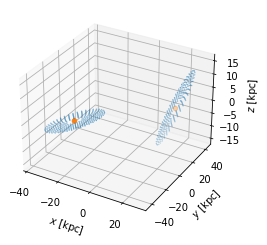

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ringcomp['x'], df_ringcomp['y'], df_ringcomp['z'], s=0.1)
ax.scatter(df_mass['x'],df_mass['y'],df_mass['z'],'o')
ax.set_xlabel(r'$x$ [kpc]')
ax.set_ylabel(r'$y$ [kpc]')
ax.set_zlabel(r'$z$ [kpc]')

In [8]:

mass = np.concatenate((df_mass['m'].to_numpy(),df_ringcomp['m'].to_numpy()))

X = np.concatenate((df_mass['x'].to_numpy(),df_ringcomp['x'].to_numpy()))
Y = np.concatenate((df_mass['y'].to_numpy(),df_ringcomp['y'].to_numpy()))
Z = np.concatenate((df_mass['z'].to_numpy(),df_ringcomp['z'].to_numpy()))
Vx = np.concatenate((df_mass['v_x'].to_numpy(),df_ringcomp['v_x'].to_numpy()))
Vy = np.concatenate((df_mass['v_y'].to_numpy(),df_ringcomp['v_y'].to_numpy()))
Vz = np.concatenate((df_mass['v_z'].to_numpy(),df_ringcomp['v_z'].to_numpy()))

stacked_data = np.stack([mass,X, Y, Z,Vx,Vy,Vz], axis=1)

print(stacked_data)

[[ 1.00000000e+00 -2.02858201e+01 -2.49697898e+01 ...  6.32390877e+00
  -2.28938680e-01  0.00000000e+00]
 [ 1.00000000e+00  2.02858201e+01  2.49697898e+01 ... -6.32390877e+00
   2.28938680e-01  0.00000000e+00]
 [ 1.00000000e-35 -1.54561910e+01 -2.49697898e+01 ...  6.32390877e+00
   2.97435097e+01  0.00000000e+00]
 ...
 [ 1.00000000e-35  2.81692977e+01  1.73768244e+01 ... -2.84823701e+00
   1.46635522e+01  6.02004008e+00]
 [ 1.00000000e-35  2.86470822e+01  1.98115743e+01 ... -3.96274115e+00
   1.55383735e+01  4.08966229e+00]
 [ 1.00000000e-35  2.89380899e+01  2.23615502e+01 ... -5.12998987e+00
   1.60712073e+01  2.06792819e+00]]


In [9]:
# Write the data to a text file
with open("out.txt", "w") as f:
    for row in stacked_data:
        row_str = "\t".join(str(x) for x in row) + "\n"
        f.write(row_str)

5.506464004516602


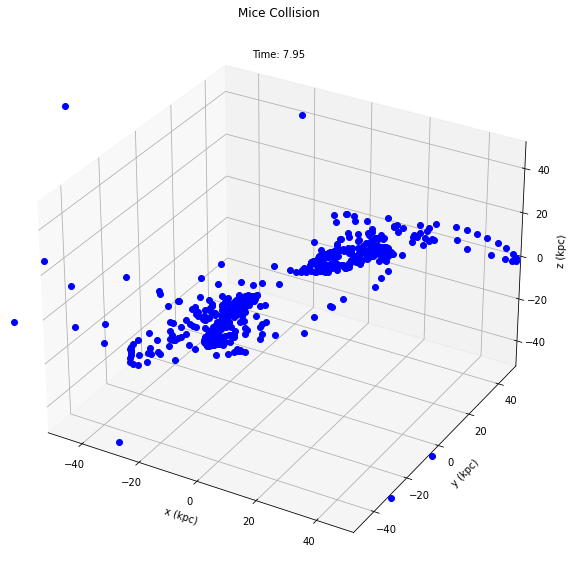

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import time

# unit system
# 

def accel_majorStars(pos: np.ndarray, G : float, M : float):
    n = 2 # number of major mass body
    A_pos = pos[0]
    B_pos = pos[1]
    a = np.zeros((n, 3)) # acceleration array

    r_vec = A_pos - B_pos 
    r_mag = np.linalg.norm(r_vec) 
    acc = -(G*M*r_vec/r_mag**3)
    A_acc = acc # accel of mass body A
    B_acc = -acc # accel of mass body B

    a[0] = A_acc 
    a[1] = B_acc
    return a 

def accel_satellites(pos_satellites: np.ndarray, pos_majorStars: np.ndarray, G: float, M: float):
    n = pos_majorStars[:,0].size # number of major masses
    m = pos_satellites[:,0].size # number of satellites
    a = np.zeros((m, 3))

    for i in range(n):
        for j in range(m):
            r_vec = pos_satellites[j] - pos_majorStars[i] 
            r_mag = np.linalg.norm(r_vec) 
            a[j] = a[j] + (-G*M*r_vec/r_mag**3)


    return a

def leapfrog(r_star: np.ndarray, v_star: np.ndarray, r_satellites: np.ndarray, v_satellites: np.ndarray, dt: float, G: float, M: float):

    # major stars leapfrog
    v_star = v_star+ 0.5*dt*accel_majorStars(r_star, G, M)
    r_star = r_star+ v_star*dt
    v_star = v_star+ 0.5*dt*accel_majorStars(r_star, G, M)



    # satellites leapfrog
    v_satellites = v_satellites + 0.5*dt*accel_satellites(r_satellites, r_star, G, M)
    r_satellites = r_satellites + v_satellites*dt
    v_satellites = v_satellites + 0.5*dt*accel_satellites(r_satellites, r_star, G, M)



    return r_star, v_star,r_satellites, v_satellites


# Constants
G = 4491.9 # kpc^3/(M * T)
M = 1 # 10^11 solar mass
dt = 0.05 # 1 T = 10^8 years
T = 8 # total time in earth_year
step = int(T/dt) # total number of steps, should be INT
L_scale = 1 # kpc

# reading initialization from csv files
# and convert to numpy vectors
df_comp = df_ringcomp
df_center = df_mass

# output container (currently using python.List)
out_star = [] 
out_satellite = []

# converting position and velocity to np.narray
position_star = df_center[['x', 'y', 'z']].to_numpy()
velocity_star = df_center[['v_x', 'v_y', 'v_z']].to_numpy()
position_satellite = df_comp[['x', 'y', 'z']].to_numpy()
velocity_satellite= df_comp[['v_x', 'v_y', 'v_z']].to_numpy()


# store initial
out_star.append(position_star)
out_satellite.append(position_satellite)


start_time = time.time()

# time evolution 
for i in range(int(step)):
    position_star, velocity_star, position_satellite, velocity_satellite = leapfrog(position_star, velocity_star, position_satellite, velocity_satellite, dt = dt, G = G, M = M)
    out_star.append(position_star)
    out_satellite.append(position_satellite)

end_time = time.time()

print(end_time-start_time)

# convert position array to numpy array
out_star = np.array(out_star)
out_satellite = np.array(out_satellite)

# assign satellite to star to plot satellite, too lazy to change the name in the below plotting code
out_star = out_satellite






############# plotting satellites

# Create the figure and axes for the plot
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

time_label = ax.text2D(0.5, 0.95, '', ha='center', va='top', transform=ax.transAxes)

# Create the initial point in the plot
point, = ax.plot(out_star[0,:,0], out_star[0,:,1], out_star[0,:,2], 'bo')

# Define the update function for the animation
def update(frame):
    # Update the position of the point
    point.set_data(out_star[frame][:,0], out_star[frame][:,1])
    point.set_3d_properties(out_star[frame][:,2])
    time = frame * dt
    time_label.set_text(f'Time: {time:.2f}')  # Format the time value with 2 decimal places
    return point,

# Create the animation object
anim = FuncAnimation(fig, update, frames = step, blit=True, interval = 100)

ax.set_xlabel("x (kpc)")
ax.set_ylabel("y (kpc)")
ax.set_zlabel("z (kpc)")
ax.set_title('Mice Collision')
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_zlim(-50,50)
anim.save('animation.mp4', writer='ffmpeg')